# Bank Marketing - Logistic Regression

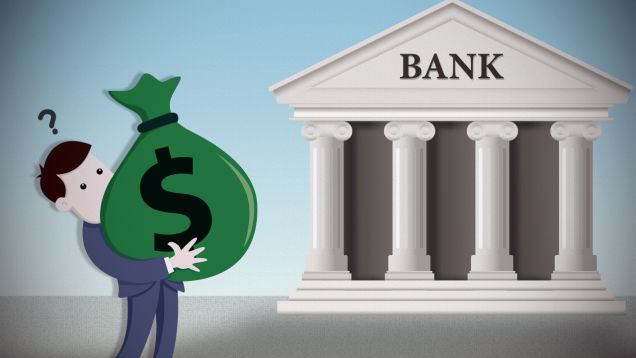

## Problem Statement

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## Objective

We will be creating a classification algorithm and also suggest them the insights we derive from this dataset and also help them to narrow down their leads into marketing funnel and in the end make a term deposit.

In [2]:
#Importing Libraries
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the Dataset
df=pd.read_csv("bank-additional-full.csv",sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Duration of Calls vs Job roles

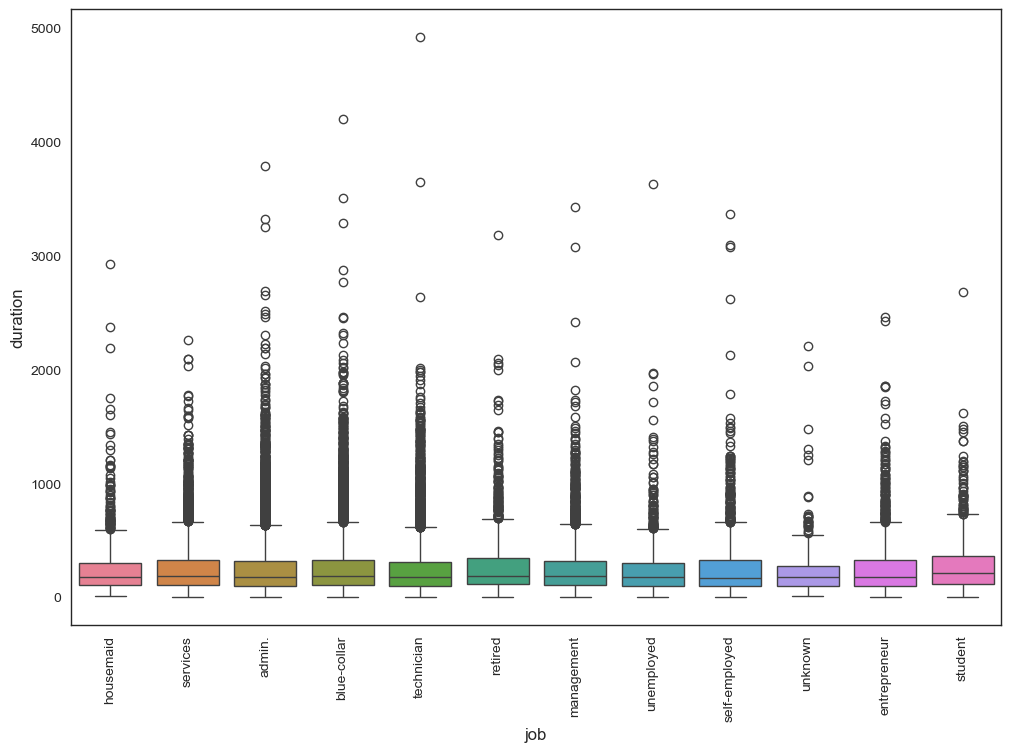

In [13]:
sns.boxplot(x = 'job', y = 'duration', data =df, hue = 'job' )
plt.xticks(rotation = 90)
plt.show()

Insights:

The leads who have not made a deposit have lesser duration on calls

Comparing the average, the blue collar, entrepreneur have high duration in calls and student, retired have less duration in average

Large distribution of leads were from self employed clients and management people.

## Campaign vs Duration of calls

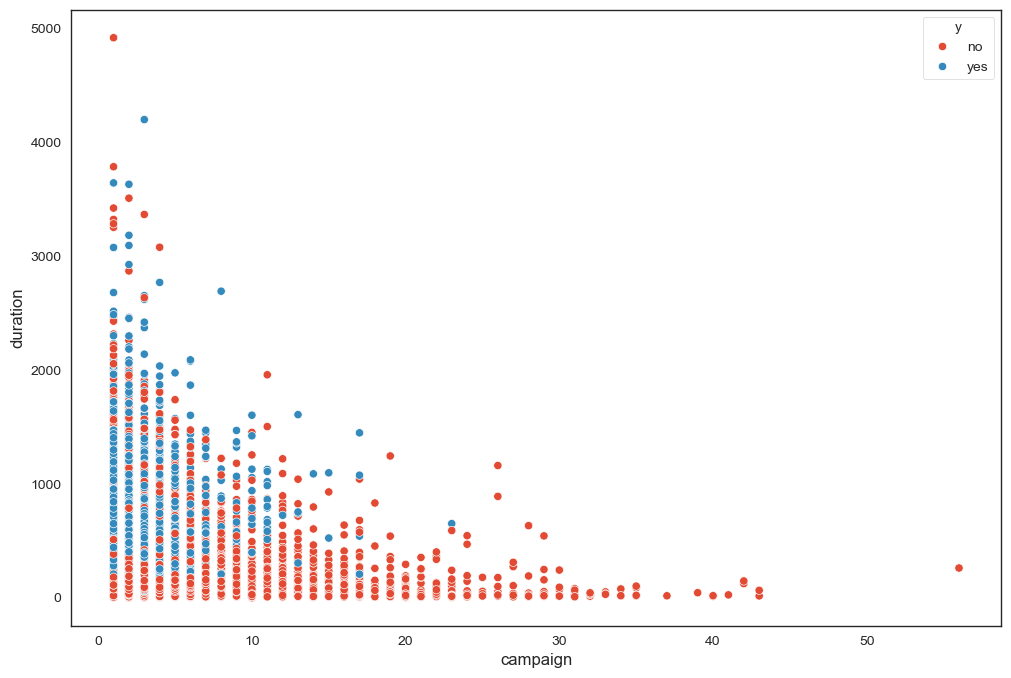

In [19]:
sns.scatterplot(df, x="campaign", y="duration", hue = 'y')
plt.show()

Insights:

The more the duration the calls were, they had higher probability in making a deposit

Duration of calls faded as the time period of campaign extended further

There were many positive leads in the initial days of campaign

Campaign vs Month

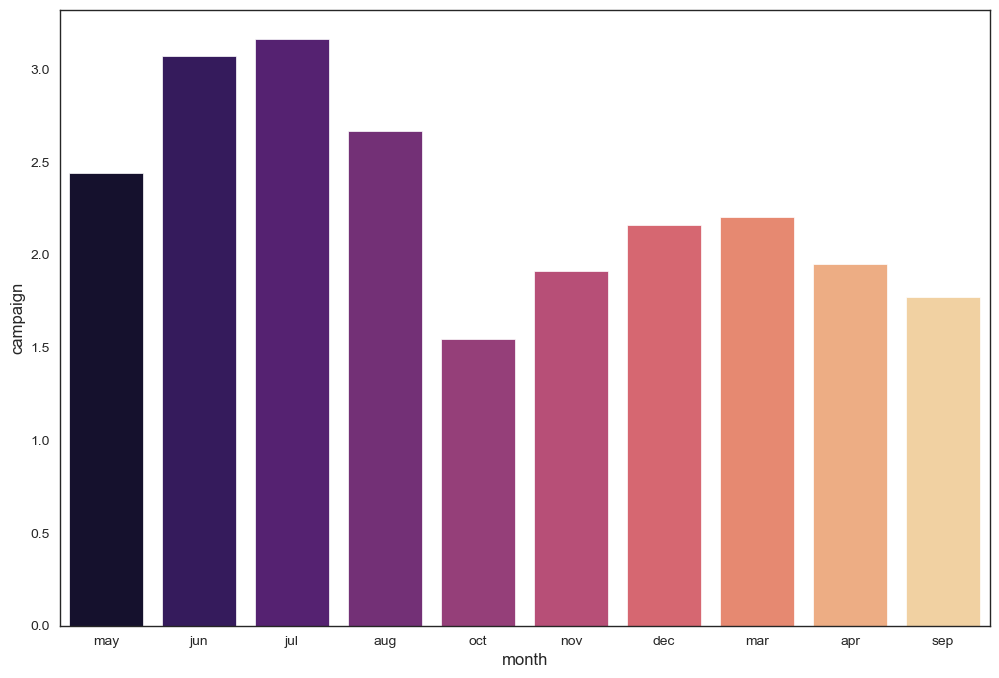

In [8]:
sns.barplot(x = 'month', y = 'campaign', data = df, ci = None, hue = 'month', palette = 'magma')
plt.show()

Insights:

We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)

Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children

They also have made their campaign in the end of the bank period.

## Marital Status vs Price Indexm

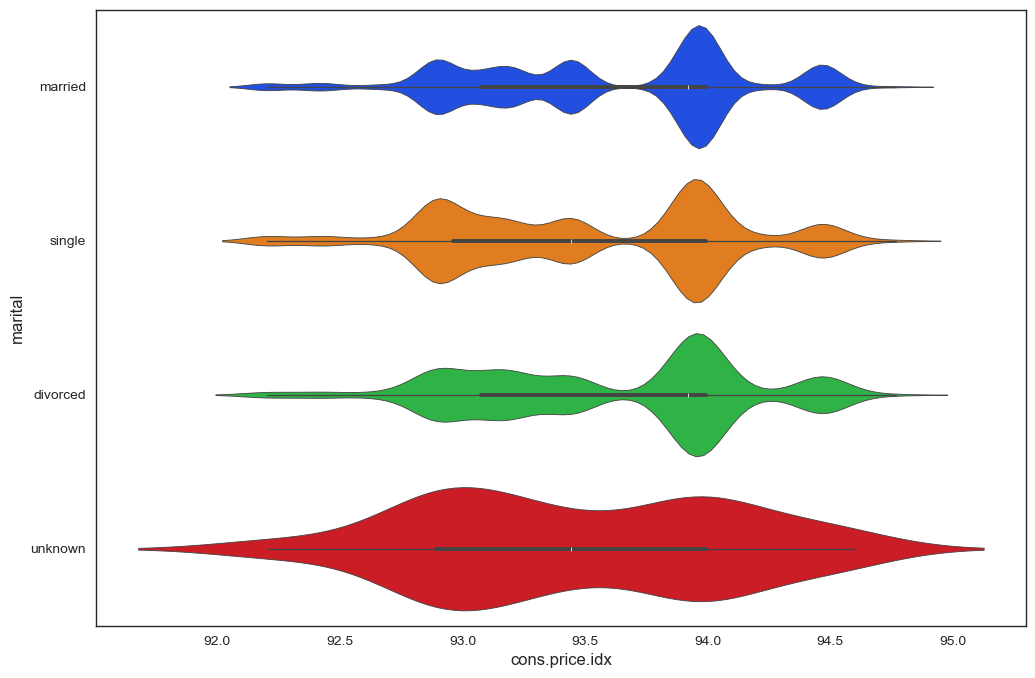

In [13]:
sns.violinplot( y="marital", x="cons.price.idx", data =df , hue = 'marital', palette = 'bright')
plt.show()

## Distribution of Quarterly Indicators

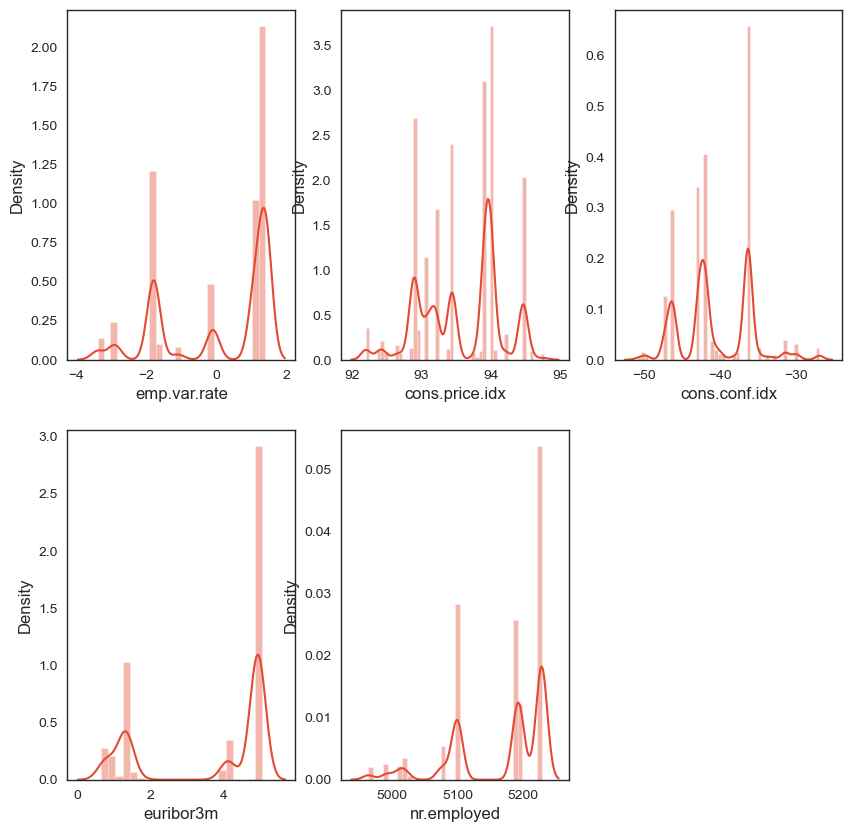

In [18]:
plt.subplot(231)
sns.distplot(df['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

Insights:

We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy

The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings

Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy

The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans

The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

## Positive deposits vs attributes

<Axes: xlabel='education'>

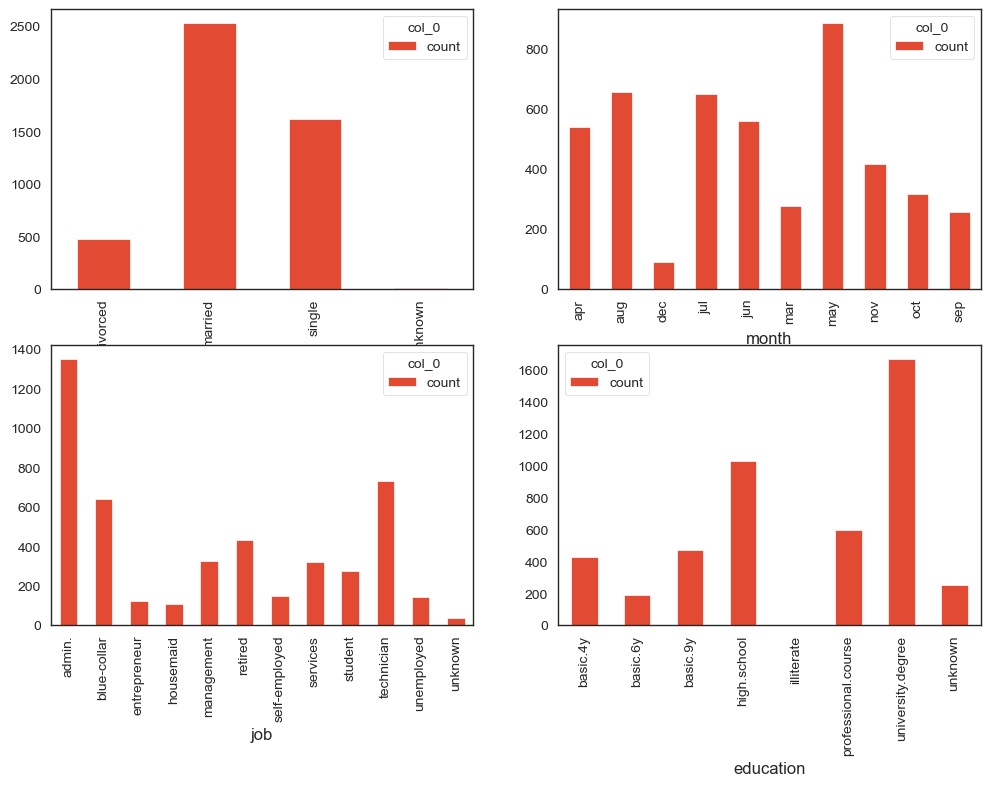

In [20]:
bank_yes = df[df['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])      

Insights:

Married leads have made high deposits followed by single

There were much deposist made during may month as it is the start of bank period

Leads who work in administrative position made deposits followed by technicians and blue collar employees

Leads who had atleast university degree had made te deposits followed by highschool

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

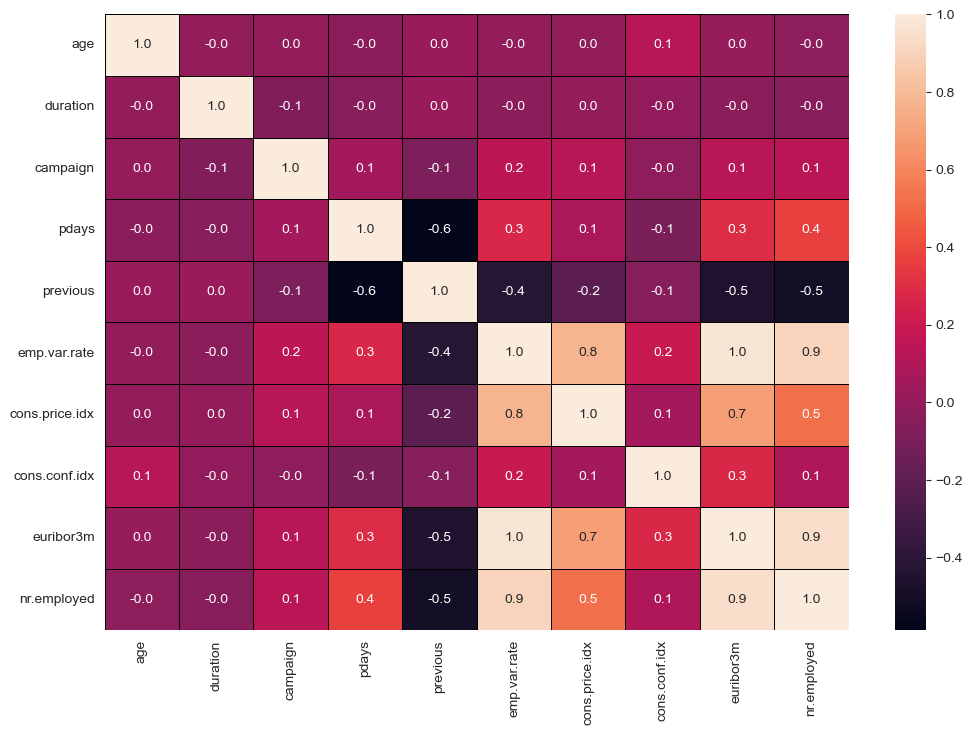

In [24]:
sns.heatmap(numeric_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")
plt.show()

Insights:

The indicators have correlation among themselves

Number of employees rate is highly correlated with employee variation rate

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate)

Employee variation rate also correlates with the bank interest rates

## Feature Engineering

In [34]:
df_copy = df.copy()

In [35]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df_copy=df_copy.loc[filter]

Text(0.5, 1.0, 'No of employees')

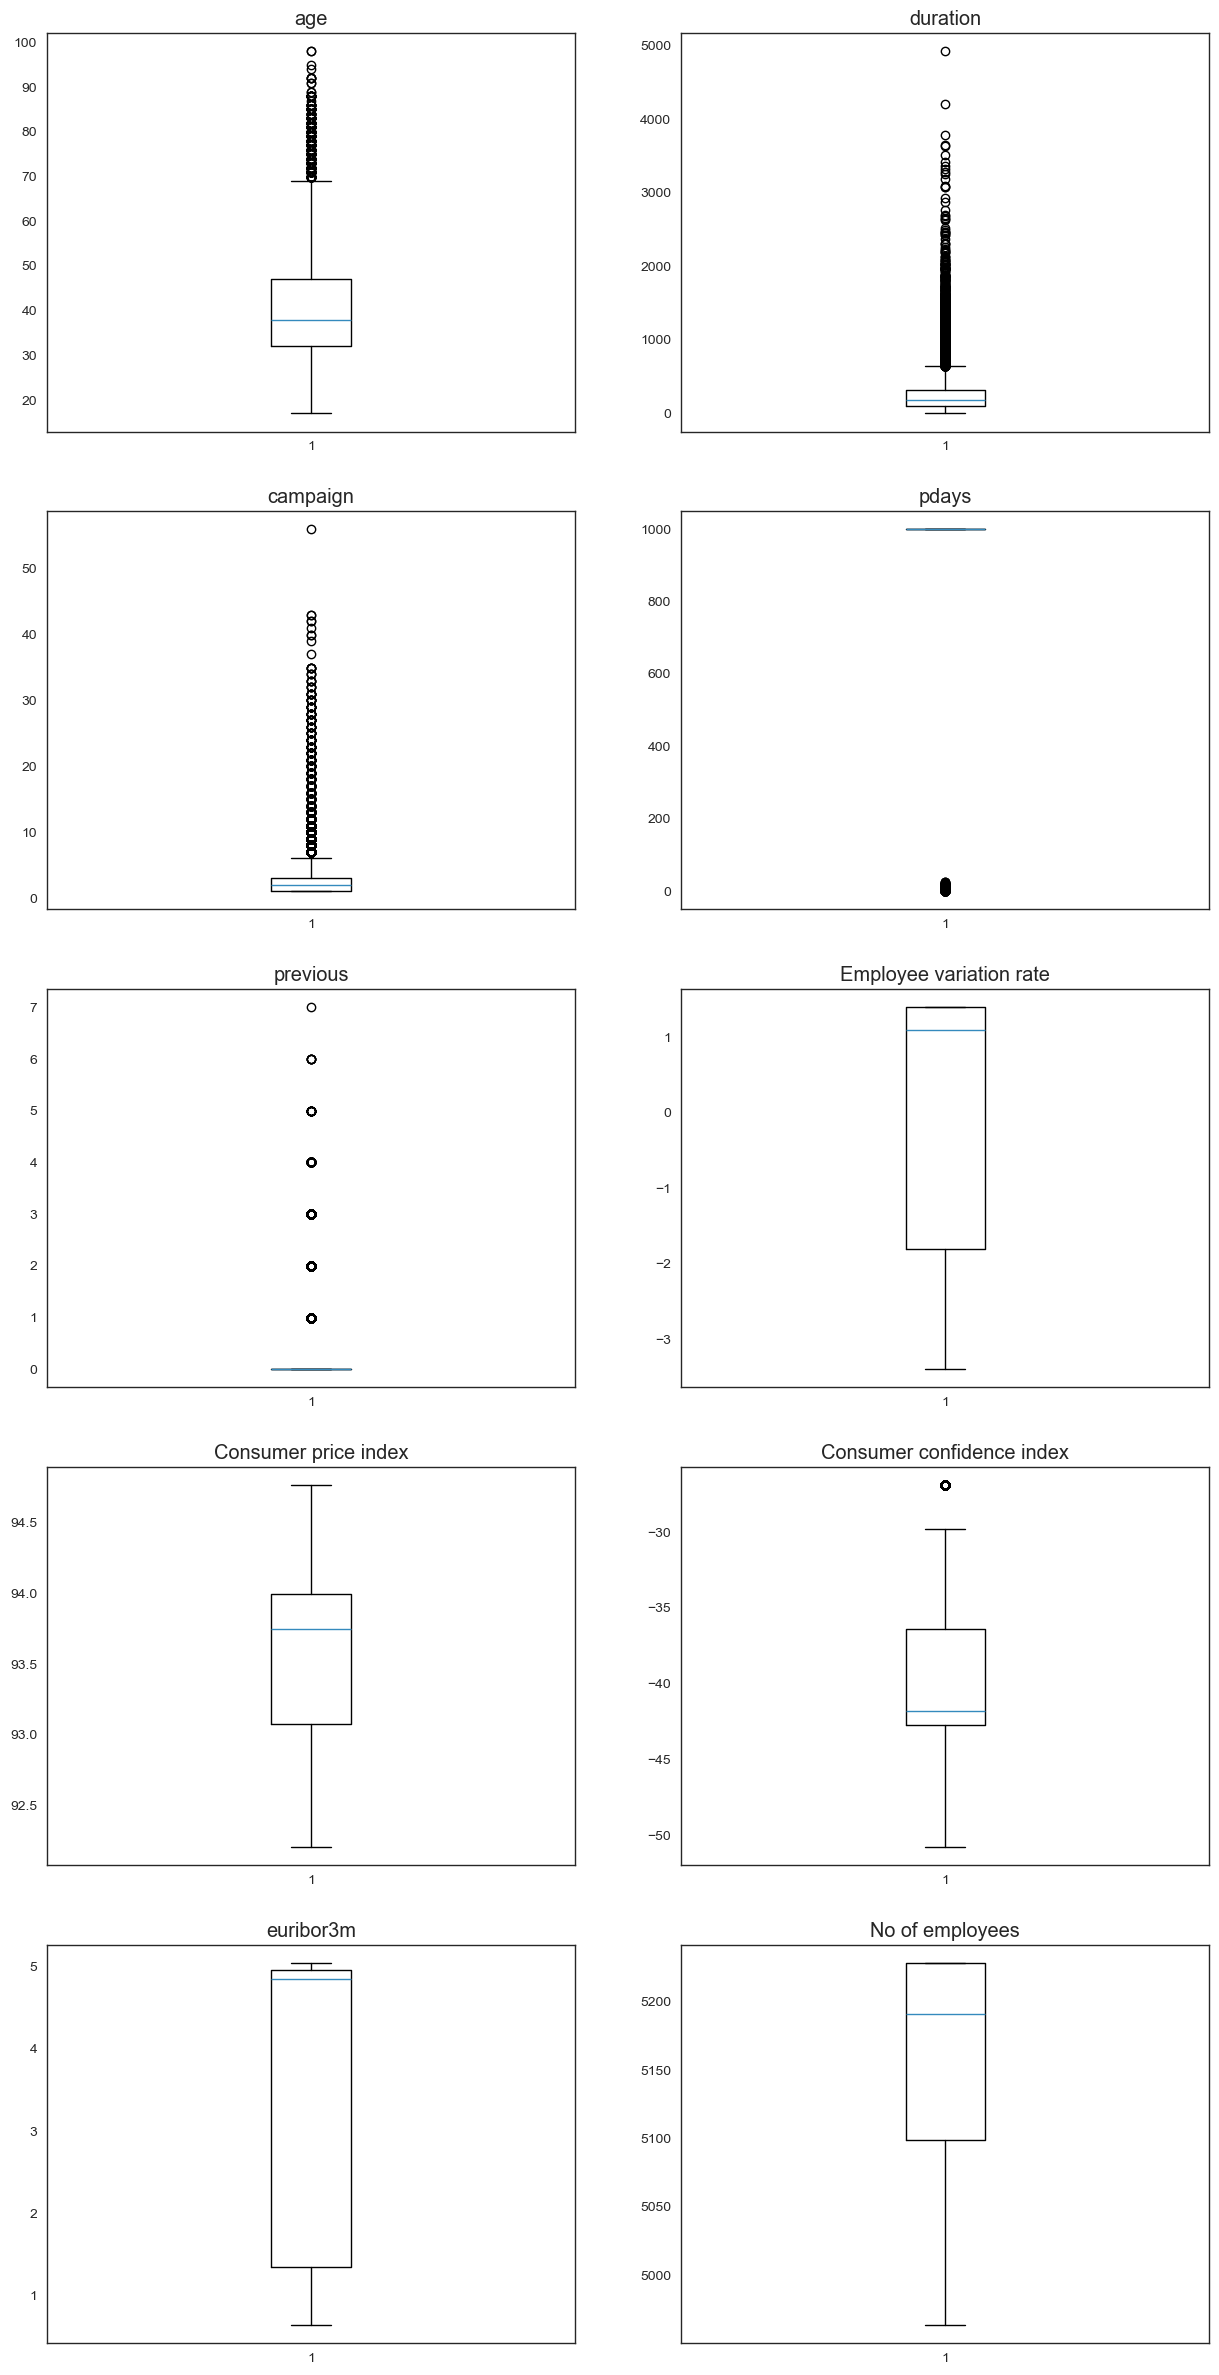

In [92]:
plt.figure(figsize = (15, 30))
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(df['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(df['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(df['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(df['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(df['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(df['nr.employed'])
ax.set_title('No of employees')

Text(0.5, 1.0, 'campaign')

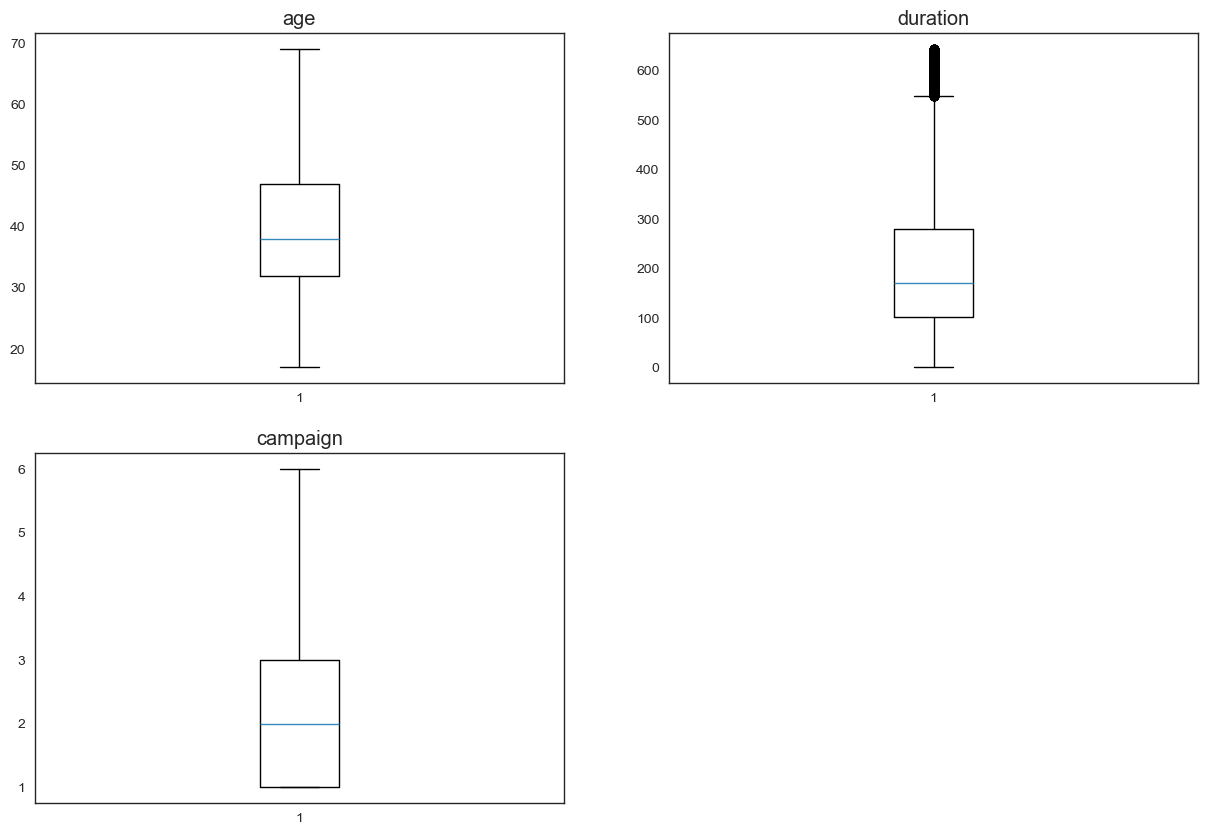

In [37]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(df_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(df_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(df_copy['campaign'])
ax.set_title('campaign')

## Education- category clubbing
Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school'

In [49]:
bank_features=df_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

education
middle.school          10679
university.degree      10551
high.school             8281
professional.course     4551
unknown                 1459
illiterate                14
Name: count, dtype: int64

Encoding - Month and Day of week

Encoding the categories in month and day of week to the respective numbers.

In [50]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

In [51]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


Encoding 999 in pdays as 0
Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [52]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [53]:
bank_features['pdays'].value_counts()

pdays
0     34280
3       367
6       342
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: count, dtype: int64

Ordinal Number Encoding

Here we are gonna encode the features which has yes,no and unknown. We'll assign yes:1,no:0 and unknown:-1

In [54]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [55]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [56]:
bank_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


Ordinal Encoding

In [57]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [58]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False


Frequency encoding

Let's use frequency encoding with job and education features in our dataset

In [59]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [60]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [61]:
bank_features.loc[:,['job','education']].head()

,job,education
0,896,10679
1,3452,8281
2,3452,8281
3,9107,10679
4,3452,8281


Target Guided Ordinal Encoding

Lets encode marital feature based on the target 'y' . First let's find the mean of target with respect to marital feature

In [62]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063764
married     0.068913
single      0.112732
unknown     0.129032
Name: y, dtype: float64

In [63]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [64]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [68]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [69]:
bank_features.marital_ordinal.value_counts()

marital_ordinal
1    21491
2    10077
0     3905
3       62
Name: count, dtype: int64

Standardization of numerical variables

In [71]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [73]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

scaled_data = scaled_data.replace({True: 1, False: 0})
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,896,10679,0,0,0,5,2,0,1,1,0,1,1.694589,0.386969,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,3452,8281,-1,0,0,5,2,0,1,1,0,1,1.797914,-0.412615,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,3452,8281,0,1,0,5,2,0,1,1,0,1,-0.268597,0.137099,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,9107,10679,0,0,0,5,2,0,1,1,0,1,0.041380,-0.398337,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,3452,8281,0,0,1,5,2,0,1,1,0,1,1.694589,0.715370,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


Feature Selection

Let's check the feature importances and prune our features to make our model perform well.


In [74]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

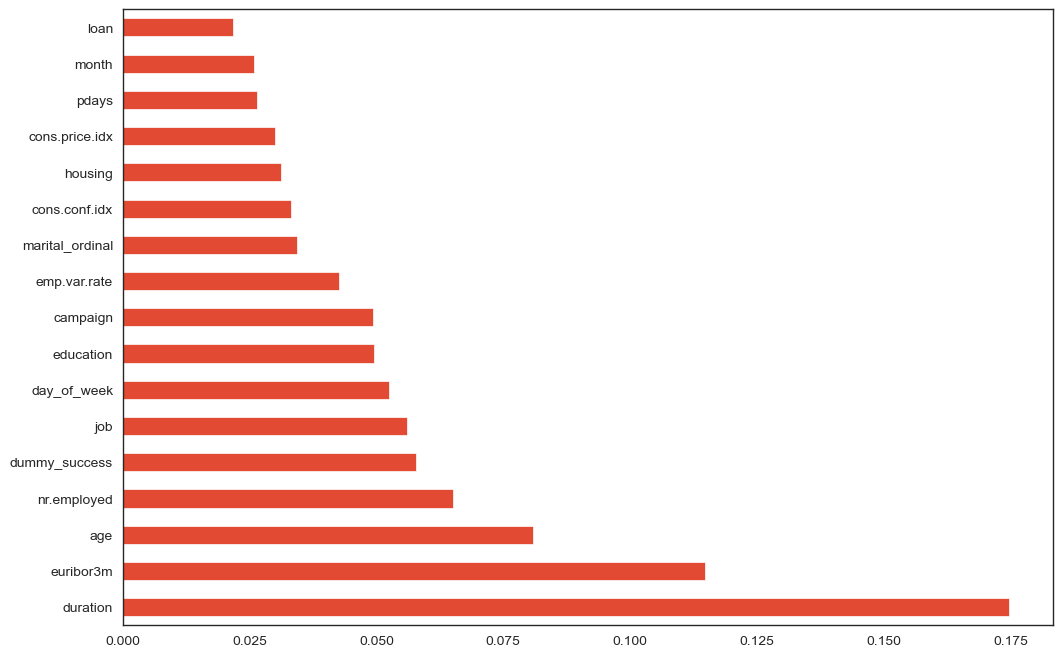

In [75]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

From the bar plot we can see the importances of features based on it's impact towards output. Let's take up the top 15 features

Train and Test Split (80:20)

Let's drop the required features and split the data into train and test

In [76]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28428, 15)
Input Test: (7107, 15)
Output Training: (28428,)
Output Test: (7107,)


# Model Selection

In [77]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8803652180083219
Decision Tree Test Accuracy: 0.6377626934271783
KNN Test Accuracy: 0.8749056849720473
SVC Test Accuracy: 0.9191220066392332
Naive Bayes Test Accuracy: 0.8190917390346456


Logistic regression with Hyperparameter tuning
Let's fit the model in logistic regression with parameter tuning and figure out the accuracy of our model

In [78]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.8286427728546842, random_state=0)
The mean accuracy of the model is: 0.9317574222597439


In [79]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6453   89]
 [ 380  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      6542
           1       0.68      0.33      0.44       565

    accuracy                           0.93      7107
   macro avg       0.81      0.66      0.70      7107
weighted avg       0.92      0.93      0.92      7107



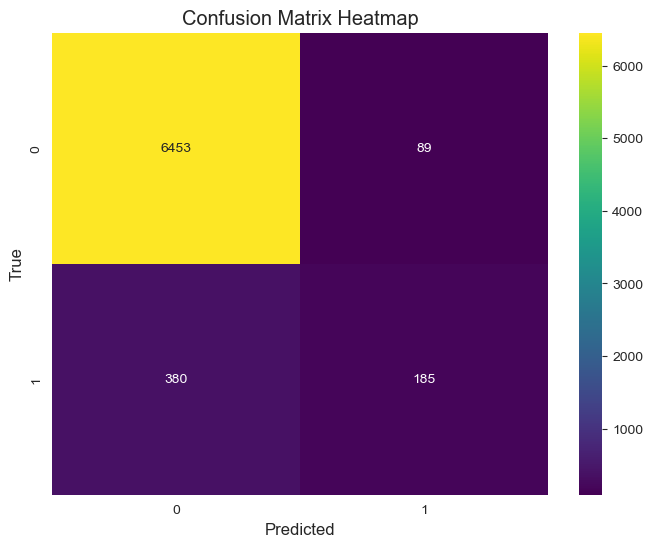

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

## ROC Curve

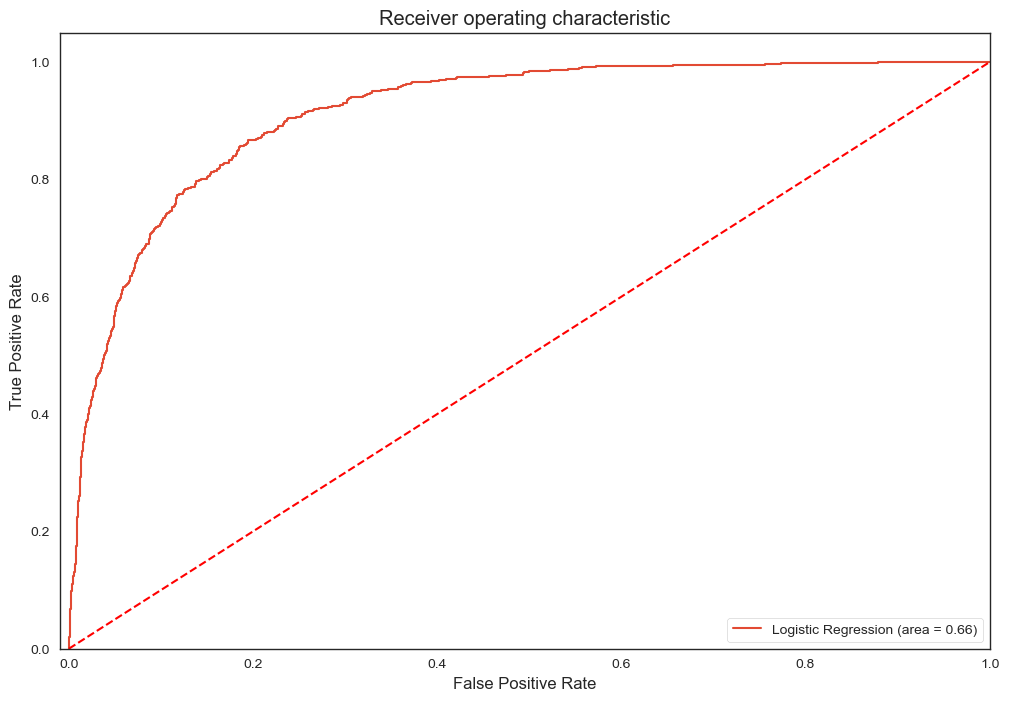

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

From the EDA and model selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

Here are the few recommendations for the bank than can help improve the deposit rate

Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences
Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit
Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history
Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor